# Jupyter notebook intro

Code cells starting with `%%` introduce special commands, lines starting with `!` are shell commands.

Otherwise they are Python (or other selected language).

In [1]:
%%writefile hello.py
print('Hello, world!')

In [2]:
!python hello.py

Hello, world!


In [3]:
message = 'Example of Python code'
message

'Example of Python code'

# Reading files in custom format

In [4]:
%%writefile custom.txt
123 = bread
134 = rolls
212 = milk
213 = butter

Overwriting custom.txt


In [5]:
%%writefile custom.py
"""Read from files that have custom format"""

# open a file for reading and iterate each line
with open('./custom.txt') as f:
    config = {}
    for line in f:
        # assign to multiple variables (tuple unpacking)
        id, name = line.strip().split(' = ')
        config[id] = name

for id in ["123", "213"]:
    print(config[id])

Overwriting custom.py


In [6]:
!python custom.py

bread
butter


## JSON files

In [7]:
%%writefile original.json
{
    "123": "bread",
    "134": "rolls",
    "212": "milk",
    "213": "butter"
}

Overwriting original.json


In [8]:
%%writefile json-files.py
"""Read and write JSON files"""

import json

with open('./original.json') as original, \
     open('./output.json', 'w') as output:
    config = json.load(original)
    config["133"] = config["134"]
    del config["134"]
    json.dump(config, output)

Overwriting json-files.py


In [9]:
!python json-files.py

In [10]:
!cat output.json

{"123": "bread", "212": "milk", "213": "butter", "133": "rolls"}


# CSV files

In [11]:
%%writefile original.csv
id,name
123,bread
134,rolls
212,milk
213,butter

Overwriting original.csv


In [12]:
import csv

with open('./original.csv') as f:
    reader = csv.reader(f)
    headers = next(reader)  # save the first line for later
    config = {}
    for id, name in reader:
        config[id] = name

config

{'123': 'bread', '134': 'rolls', '212': 'milk', '213': 'butter'}

In [13]:
with open('./output.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=';')
    writer.writerow(headers)
    for id, name in config.items():
        writer.writerow([id, name])

In [14]:
!cat output.csv

id;name
123;bread
134;rolls
212;milk
213;butter


# Pandas

https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html

In [19]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('./original.csv')

# Pandas' data frame
df

,id,name
0,123,bread
1,134,rolls
2,212,milk
3,213,butter


In [21]:
# data series (1 column of a data frame)
df.id

0    123
1    134
2    212
3    213
Name: id, dtype: int64

In [22]:
# filter data series based on other column(s)
df.name[df.id > 200]

2      milk
3    butter
Name: name, dtype: object

In [23]:
# convert to a numpy array
df.name[df.id > 200].values

array(['milk', 'butter'], dtype=object)

In [24]:
# vectorized operations
df.id * 2

0    246
1    268
2    424
3    426
Name: id, dtype: int64

In [25]:
df["tripple"] = df.id * 3
df

,id,name,tripple
0,123,bread,369
1,134,rolls,402
2,212,milk,636
3,213,butter,639


In [26]:
df[['tripple', 'name']].to_csv('./output-pandas.csv', index=False)

In [27]:
!cat output-pandas.csv

tripple,name
369,bread
402,rolls
636,milk
639,butter


# Pandas MultiIndex for higher dimensions
https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

In [28]:
xs = np.arange(2)
ys = np.arange(2)
ts = np.arange(1000)

index = pd.MultiIndex.from_product([ts, xs, ys], names=['t', 'x', 'y'])
index

MultiIndex([(  0, 0, 0),
            (  0, 0, 1),
            (  0, 1, 0),
            (  0, 1, 1),
            (  1, 0, 0),
            (  1, 0, 1),
            (  1, 1, 0),
            (  1, 1, 1),
            (  2, 0, 0),
            (  2, 0, 1),
            ...
            (997, 1, 0),
            (997, 1, 1),
            (998, 0, 0),
            (998, 0, 1),
            (998, 1, 0),
            (998, 1, 1),
            (999, 0, 0),
            (999, 0, 1),
            (999, 1, 0),
            (999, 1, 1)],
           names=['t', 'x', 'y'], length=4000)

In [29]:
df = pd.DataFrame(np.random.randint(0, 256, (len(index), 3)), index=index, columns=['r', 'g', 'b'])
df

r    g    b
t   x y               
0   0 0  213  214  165
      1   21  168   64
    1 0  203  119  161
      1   80   42   75
1   0 0   51  172  168
...      ...  ...  ...
998 1 1  178   28  236
999 0 0  124   68  222
      1   94  118   45
    1 0   69  174  127
      1  123  208    3

[4000 rows x 3 columns]

In [31]:
# average for each (x, y) point across all values of t

df.mean(level=('x', 'y'))

r        g        b
x y                           
0 0  127.194  127.220  128.507
  1  130.036  129.883  128.578
1 0  128.128  130.246  128.989
  1  121.863  124.992  129.119

In [32]:
# vectorized formula, like in Excel

luminance = 0.2126*df.r + 0.7152*df.g + 0.0722*df.b
luminance

t    x  y
0    0  0    210.2496
        1    129.2390
     1  0    139.8908
        1     52.4614
1    0  0    145.9866
               ...   
998  1  1     74.9076
999  0  0     91.0244
        1    107.6270
     1  0    148.2836
        1    175.1280
Length: 4000, dtype: float64

In [33]:
totals = luminance.sum(level='t')
totals

t
0      531.8408
1      627.2806
2      462.1614
3      550.2894
4      418.8206
         ...   
995    370.6816
996    366.8784
997    547.6750
998    416.1864
999    522.0630
Length: 1000, dtype: float64

In [34]:
totals.head(100).sum()

51864.44679999999

In [35]:
big_picture = totals.groupby(totals.index // 100).sum()
big_picture

t
0    51864.4468
1    49531.1818
2    51068.3182
3    52402.7478
4    53265.6204
5    49839.8438
6    50607.2500
7    50180.1882
8    52305.1564
9    50393.6490
dtype: float64

In [54]:
big_picture.sort_values(ascending=False).head(3)

t
4    53265.6204
3    52402.7478
8    52305.1564
dtype: float64

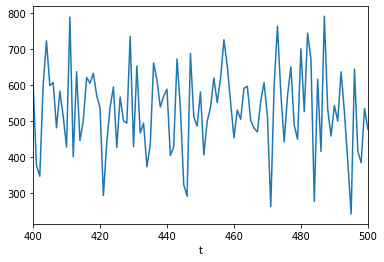

In [57]:
ax = totals[400:501].plot.line()